In [ ]:
# split 75 25

root
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)

+--------------------+------+--------+---------+----+------+------+--------+------------+------+-------+--

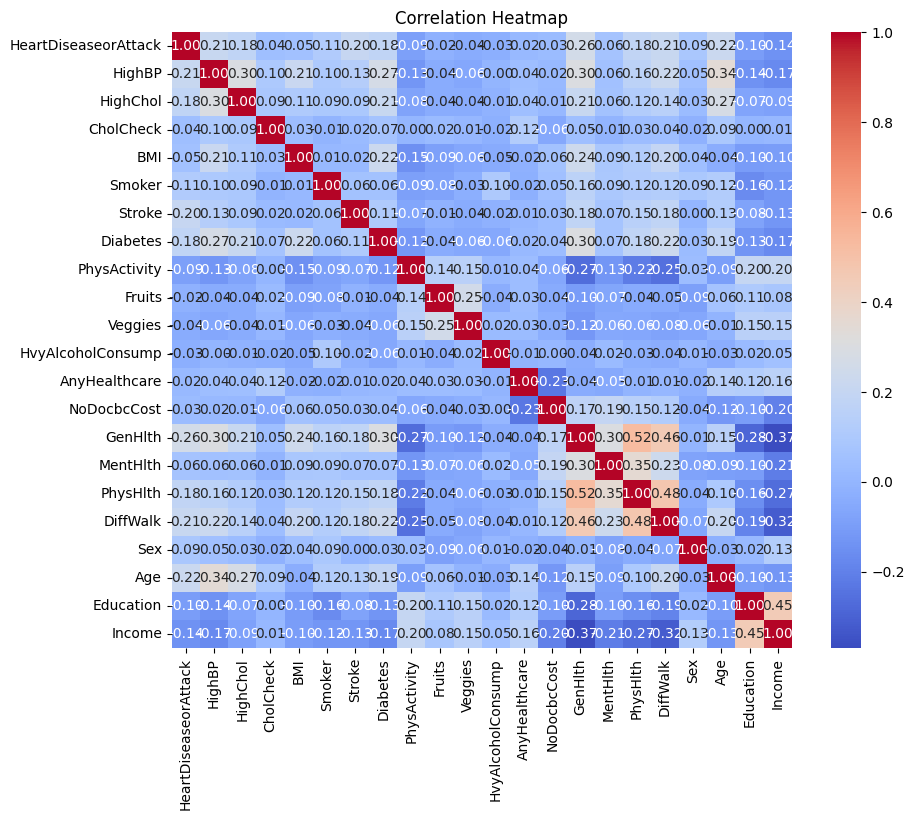

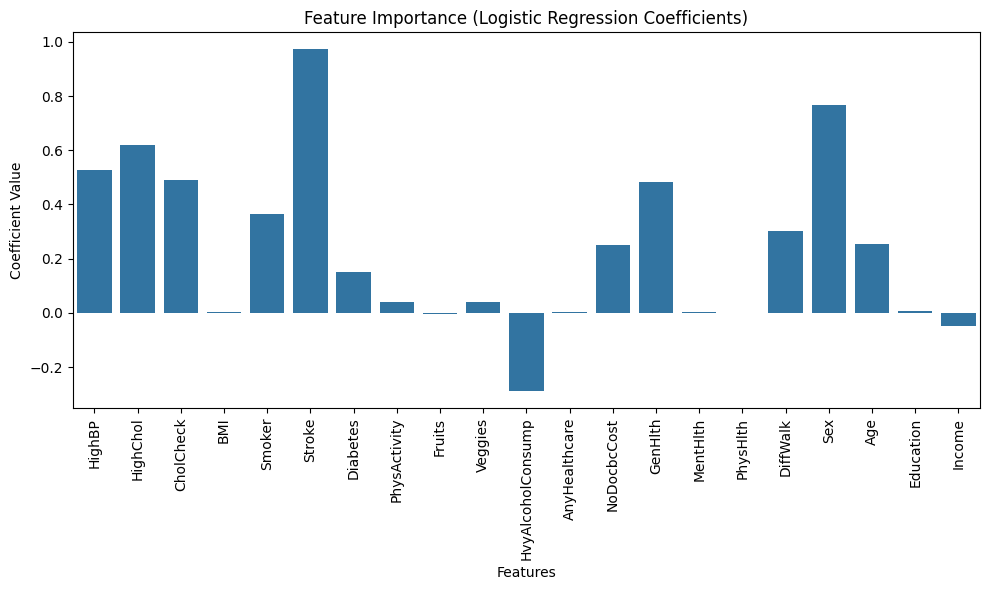

+--------------------+----------+-----+
|HeartDiseaseorAttack|prediction|count|
+--------------------+----------+-----+
|                 1.0|       1.0|  765|
|                 0.0|       1.0|  652|
|                 1.0|       0.0| 5141|
|                 0.0|       0.0|56863|
+--------------------+----------+-----+

Confusion Matrix:
[[56863   652]
 [ 5141   765]]


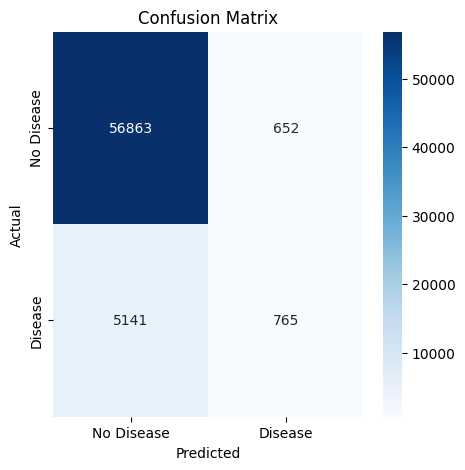

Metrics computed from confusion matrix:
Accuracy:  0.9086580154838303
Classification Error: 0.0913419845161697
Sensitivity/Recall:  0.1295292922451744
Specificity:  0.9886638268277841
Precision:  0.5398729710656316
False Positive Rate: 0.011336173172215913


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnull, when, count, col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.types import IntegerType, DoubleType
from sklearn import metrics

# Create a Spark session
spark = SparkSession.builder.appName('ml-cls').getOrCreate()

# Load the dataset
df = spark.read.csv('/content/drive/MyDrive/heart_disease_health_indicators.csv', header=True, inferSchema=True)

# Show the schema and first few rows to check column names
df.printSchema()
df.show(5)

# Check for missing values
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

# Drop unnecessary columns
df = df.drop('skin_triceps', 'bp_diastolic')  # Replace these with column names that are unnecessary in your dataset

# Select only numerical columns for heatmap
numerical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType))]

# Create a Pandas DataFrame for numerical columns
df_pandas = df.select(numerical_cols).toPandas()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_pandas.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Define label column
label_column = 'HeartDiseaseorAttack'  # Replace with the correct label column name
X = df.drop(label_column)  # Drop the label column

# Assemble features
assembler = VectorAssembler(inputCols=X.columns, outputCol='features')
transformed_data = assembler.transform(df)

# Split data into training and testing sets
(X_train, X_test) = transformed_data.randomSplit([0.75, 0.25])

# Build and train Logistic Regression model
lr_clf = LogisticRegression(featuresCol='features', labelCol=label_column)
lr_model = lr_clf.fit(X_train)

# Make predictions
predictions = lr_model.transform(X_test)

# Feature importance (Logistic Regression does not have direct feature importances like Random Forest, but we can look at coefficients)
coefficients = lr_model.coefficients
feature_names = X.columns

# Plot coefficients (Feature Importance equivalent)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=coefficients)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Evaluate model
predictions.groupBy(label_column, 'prediction').count().show()

# Calculate evaluation metrics
y_true = predictions.select(label_column).rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()
cm = metrics.confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate evaluation metrics
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TN + TP) / (TN + TP + FN + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

# Print metrics
print('Metrics computed from confusion matrix:')
print("Accuracy: ", accuracy)
print("Classification Error:", 1 - accuracy)
print("Sensitivity/Recall: ", recall)
print("Specificity: ", specificity)
print("Precision: ", precision)
print("False Positive Rate:", 1 - specificity)


In [ ]:
# split 70 30

root
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)

+--------------------+------+--------+---------+----+------+------+--------+------------+------+-------+--

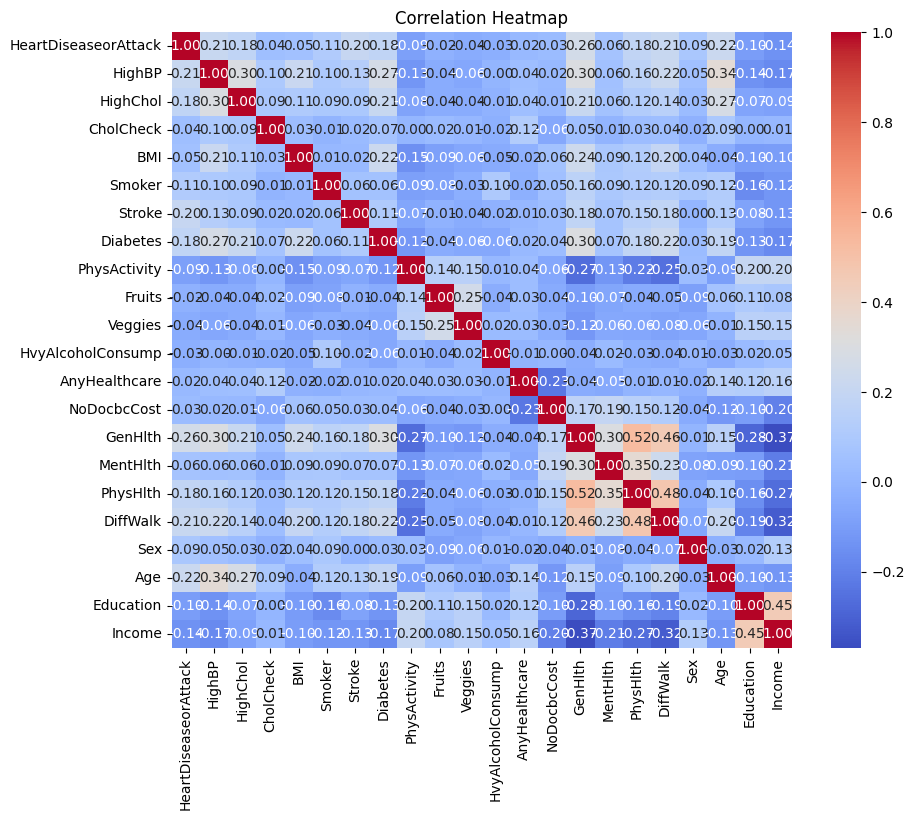

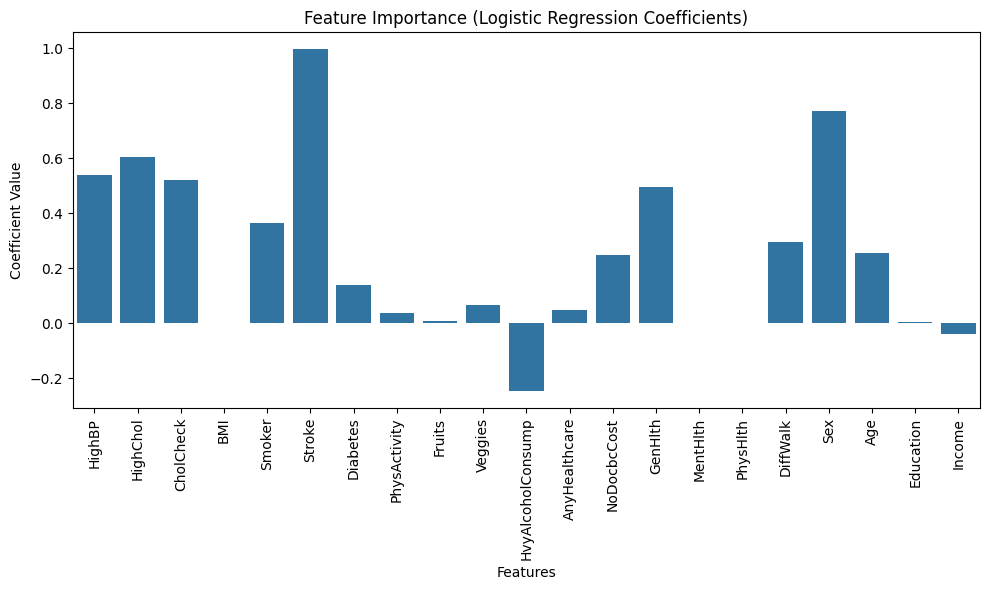

+--------------------+----------+-----+
|HeartDiseaseorAttack|prediction|count|
+--------------------+----------+-----+
|                 1.0|       1.0|  962|
|                 0.0|       1.0|  776|
|                 1.0|       0.0| 6233|
|                 0.0|       0.0|68062|
+--------------------+----------+-----+

Confusion Matrix:
[[68062   776]
 [ 6233   962]]


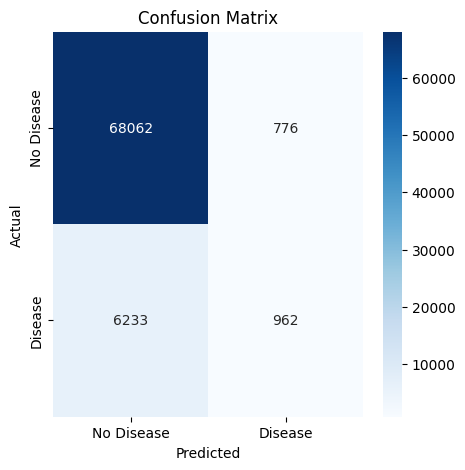

Metrics computed from confusion matrix:
Accuracy:  0.9078163429037391
Classification Error: 0.09218365709626086
Sensitivity/Recall:  0.13370396108408616
Specificity:  0.9887271565123914
Precision:  0.5535097813578826
False Positive Rate: 0.011272843487608597


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnull, when, count, col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.types import IntegerType, DoubleType
from sklearn import metrics

# Create a Spark session
spark = SparkSession.builder.appName('ml-cls').getOrCreate()

# Load the dataset
df = spark.read.csv('/content/drive/MyDrive/heart_disease_health_indicators.csv', header=True, inferSchema=True)

# Show the schema and first few rows to check column names
df.printSchema()
df.show(5)

# Check for missing values
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

# Drop unnecessary columns
df = df.drop('skin_triceps', 'bp_diastolic')  # Replace these with column names that are unnecessary in your dataset

# Select only numerical columns for heatmap
numerical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType))]

# Create a Pandas DataFrame for numerical columns
df_pandas = df.select(numerical_cols).toPandas()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_pandas.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Define label column
label_column = 'HeartDiseaseorAttack'  # Replace with the correct label column name
X = df.drop(label_column)  # Drop the label column

# Assemble features
assembler = VectorAssembler(inputCols=X.columns, outputCol='features')
transformed_data = assembler.transform(df)

# Split data into training and testing sets
(X_train, X_test) = transformed_data.randomSplit([0.7, 0.3])

# Build and train Logistic Regression model
lr_clf = LogisticRegression(featuresCol='features', labelCol=label_column)
lr_model = lr_clf.fit(X_train)

# Make predictions
predictions = lr_model.transform(X_test)

# Feature importance (Logistic Regression does not have direct feature importances like Random Forest, but we can look at coefficients)
coefficients = lr_model.coefficients
feature_names = X.columns

# Plot coefficients (Feature Importance equivalent)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=coefficients)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Evaluate model
predictions.groupBy(label_column, 'prediction').count().show()

# Calculate evaluation metrics
y_true = predictions.select(label_column).rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()
cm = metrics.confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate evaluation metrics
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TN + TP) / (TN + TP + FN + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

# Print metrics
print('Metrics computed from confusion matrix:')
print("Accuracy: ", accuracy)
print("Classification Error:", 1 - accuracy)
print("Sensitivity/Recall: ", recall)
print("Specificity: ", specificity)
print("Precision: ", precision)
print("False Positive Rate:", 1 - specificity)


In [ ]:
# split 80 20

root
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)

+--------------------+------+--------+---------+----+------+------+--------+------------+------+-------+--

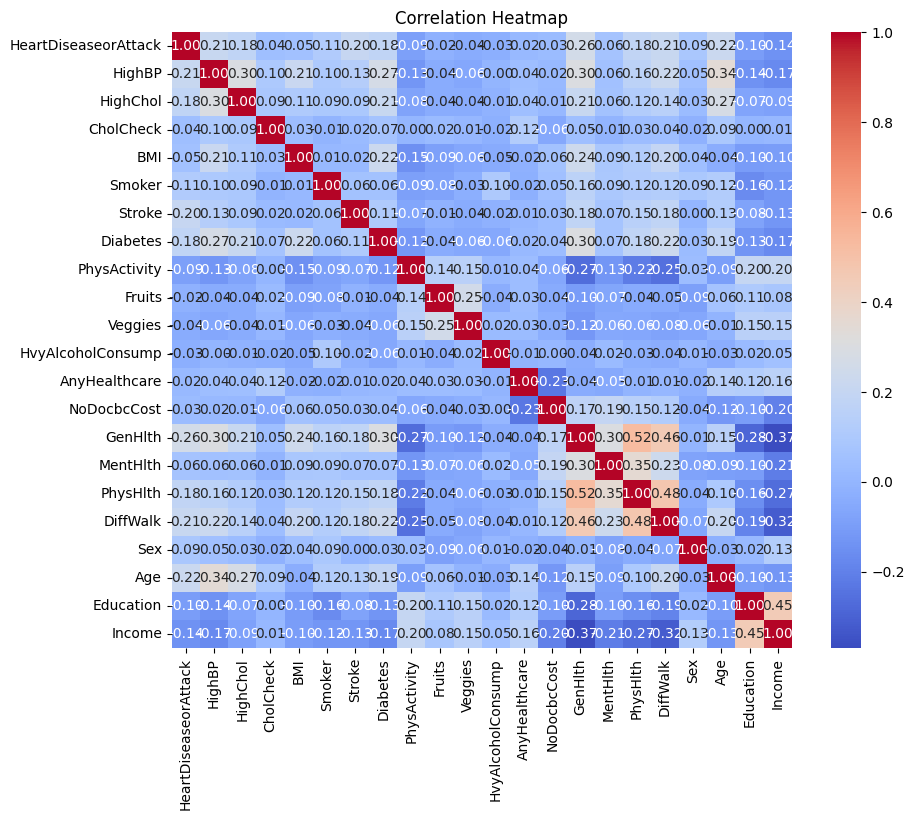

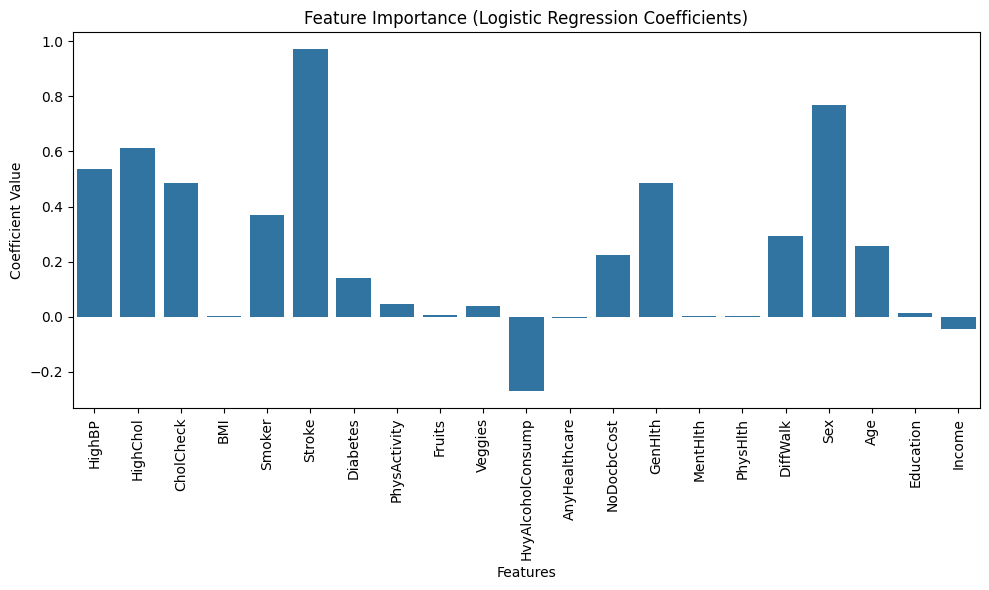

+--------------------+----------+-----+
|HeartDiseaseorAttack|prediction|count|
+--------------------+----------+-----+
|                 1.0|       1.0|  624|
|                 0.0|       1.0|  499|
|                 1.0|       0.0| 4181|
|                 0.0|       0.0|45772|
+--------------------+----------+-----+

Confusion Matrix:
[[45772   499]
 [ 4181   624]]


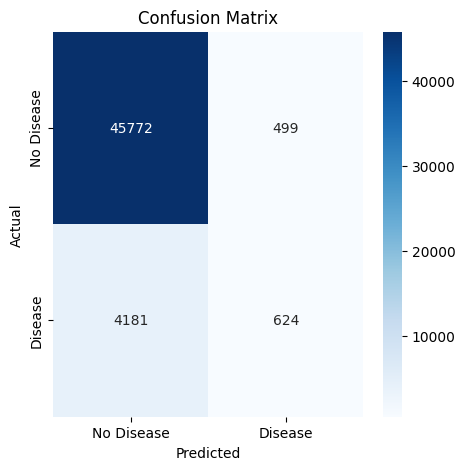

Metrics computed from confusion matrix:
Accuracy:  0.9083718380452659
Classification Error: 0.09162816195473411
Sensitivity/Recall:  0.12986472424557752
Specificity:  0.9892157074625575
Precision:  0.5556544968833482
False Positive Rate: 0.010784292537442508


In [ ]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnull, when, count, col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.types import IntegerType, DoubleType
from sklearn import metrics

# Create a Spark session
spark = SparkSession.builder.appName('ml-cls').getOrCreate()

# Load the dataset
df = spark.read.csv('/content/drive/MyDrive/heart_disease_health_indicators.csv', header=True, inferSchema=True)

# Show the schema and first few rows to check column names
df.printSchema()
df.show(5)

# Check for missing values
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

# Drop unnecessary columns
df = df.drop('skin_triceps', 'bp_diastolic')  # Replace these with column names that are unnecessary in your dataset

# Select only numerical columns for heatmap
numerical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType))]

# Create a Pandas DataFrame for numerical columns
df_pandas = df.select(numerical_cols).toPandas()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_pandas.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Define label column
label_column = 'HeartDiseaseorAttack'  # Replace with the correct label column name
X = df.drop(label_column)  # Drop the label column

# Assemble features
assembler = VectorAssembler(inputCols=X.columns, outputCol='features')
transformed_data = assembler.transform(df)

# Split data into training and testing sets
(X_train, X_test) = transformed_data.randomSplit([0.8, 0.2])

# Build and train Logistic Regression model
lr_clf = LogisticRegression(featuresCol='features', labelCol=label_column)
lr_model = lr_clf.fit(X_train)

# Make predictions
predictions = lr_model.transform(X_test)

# Feature importance (Logistic Regression does not have direct feature importances like Random Forest, but we can look at coefficients)
coefficients = lr_model.coefficients
feature_names = X.columns

# Plot coefficients (Feature Importance equivalent)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=coefficients)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Evaluate model
predictions.groupBy(label_column, 'prediction').count().show()

# Calculate evaluation metrics
y_true = predictions.select(label_column).rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()
cm = metrics.confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate evaluation metrics
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TN + TP) / (TN + TP + FN + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

# Print metrics
print('Metrics computed from confusion matrix:')
print("Accuracy: ", accuracy)
print("Classification Error:", 1 - accuracy)
print("Sensitivity/Recall: ", recall)
print("Specificity: ", specificity)
print("Precision: ", precision)
print("False Positive Rate:", 1 - specificity)


root
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- Diabetes: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)

+--------------------+------+--------+---------+----+------+------+--------+------------+------+-------+--

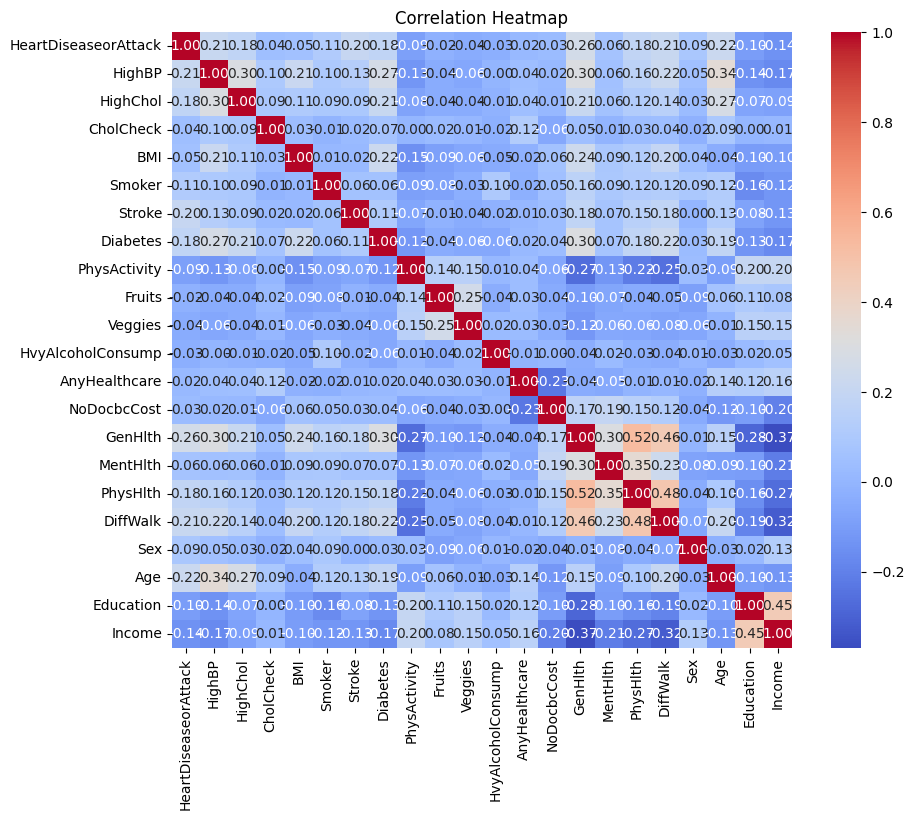

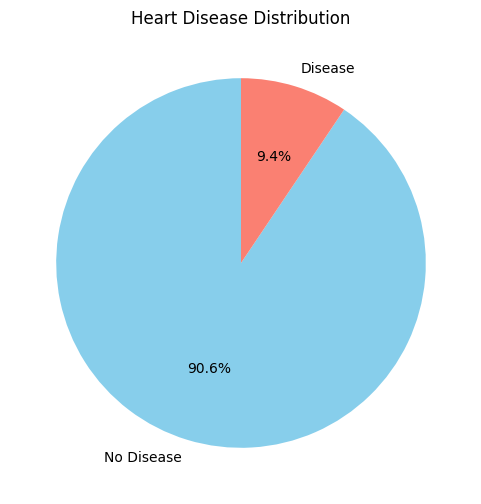

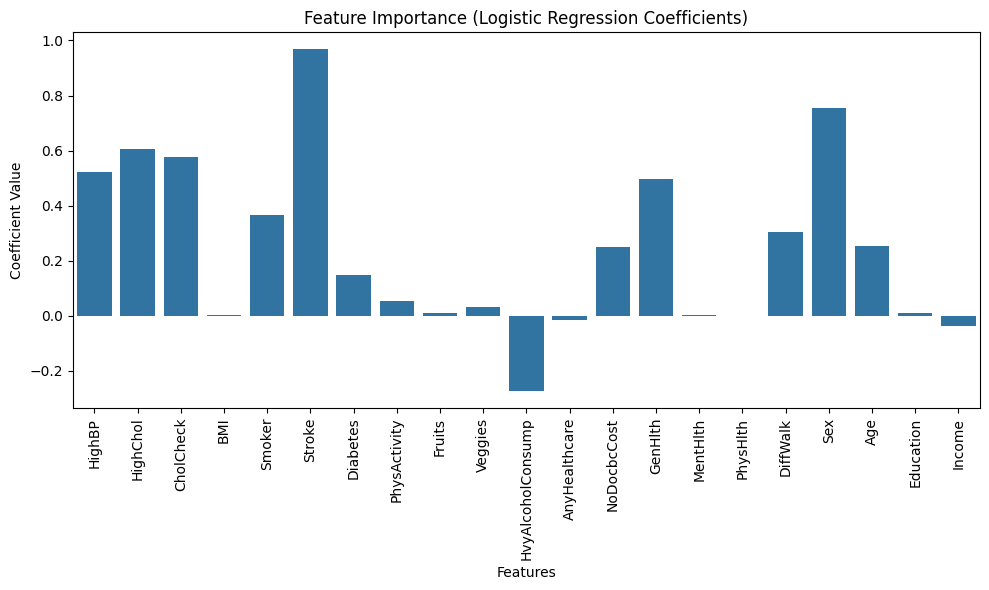

+--------------------+----------+-----+
|HeartDiseaseorAttack|prediction|count|
+--------------------+----------+-----+
|                 1.0|       1.0|  593|
|                 0.0|       1.0|  485|
|                 1.0|       0.0| 4188|
|                 0.0|       0.0|45379|
+--------------------+----------+-----+

Confusion Matrix:
[[45379   485]
 [ 4188   593]]


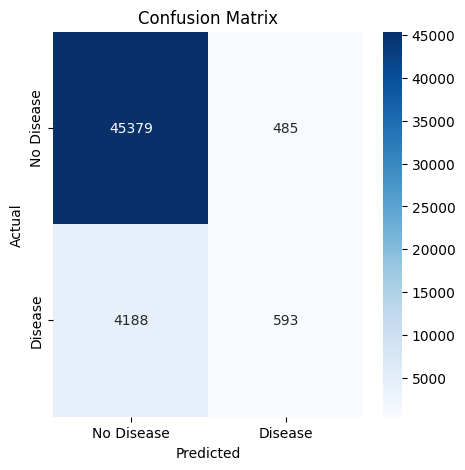

Metrics computed from confusion matrix:
Accuracy:  0.9077302793957942
Classification Error: 0.0922697206042058
Sensitivity/Recall:  0.1240326291570801
Specificity:  0.9894252572824002
Precision:  0.5500927643784786
False Positive Rate: 0.010574742717599839


In [1]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnull, when, count, col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.types import IntegerType, DoubleType
from sklearn import metrics

# Create a Spark session
spark = SparkSession.builder.appName('ml-cls').getOrCreate()

# Load the dataset
df = spark.read.csv('/content/drive/MyDrive/heart_disease_health_indicators.csv', header=True, inferSchema=True)

# Show the schema and first few rows to check column names
df.printSchema()
df.show(5)

# Check for missing values
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

# Drop unnecessary columns
df = df.drop('skin_triceps', 'bp_diastolic')  # Replace these with column names that are unnecessary in your dataset

# Select only numerical columns for heatmap
numerical_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, (IntegerType, DoubleType))]

# Create a Pandas DataFrame for numerical columns
df_pandas = df.select(numerical_cols).toPandas()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_pandas.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Plot pie chart for heart disease distribution
heart_disease_counts = df.groupBy('HeartDiseaseorAttack').count().toPandas()
labels = ['No Disease', 'Disease']
sizes = heart_disease_counts['count']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Heart Disease Distribution')
plt.show()

# Define label column
label_column = 'HeartDiseaseorAttack'  # Replace with the correct label column name
X = df.drop(label_column)  # Drop the label column

# Assemble features
assembler = VectorAssembler(inputCols=X.columns, outputCol='features')
transformed_data = assembler.transform(df)

# Split data into training and testing sets
(X_train, X_test) = transformed_data.randomSplit([0.8, 0.2])

# Build and train Logistic Regression model
lr_clf = LogisticRegression(featuresCol='features', labelCol=label_column)
lr_model = lr_clf.fit(X_train)

# Make predictions
predictions = lr_model.transform(X_test)

# Feature importance (Logistic Regression does not have direct feature importances like Random Forest, but we can look at coefficients)
coefficients = lr_model.coefficients
feature_names = X.columns

# Plot coefficients (Feature Importance equivalent)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_names, y=coefficients)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Evaluate model
predictions.groupBy(label_column, 'prediction').count().show()

# Calculate evaluation metrics
y_true = predictions.select(label_column).rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()
cm = metrics.confusion_matrix(y_true, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate evaluation metrics
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TN + TP) / (TN + TP + FN + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)

# Print metrics
print('Metrics computed from confusion matrix:')
print("Accuracy: ", accuracy)
print("Classification Error:", 1 - accuracy)
print("Sensitivity/Recall: ", recall)
print("Specificity: ", specificity)
print("Precision: ", precision)
print("False Positive Rate:", 1 - specificity)
